# CARNIVAL

CARNIVAL (CAusal Reasoning for Network identification using Integer VALue programming) is a method for the identification of upstream reguatory signalling pathways from downstream gene expression (GEX). Applications of CARNIVAL include the identification of drug’s modes of action and of deregulated processes in diseases (even if the molecular targets remain unknown) by deciphering the alterations of main signalling pathways as well as alternative pathways and off-target effects.

<center style="margin:25px">
    <img src="/_static/carnival-abstract.png" alt="CARNIVAL abstract" style="width: 100%; max-width:800px; margin-bottom:10px;" onerror="this.onerror=null; this.src='https://github.com/saezlab/PerMedCoE_tools_virtual_course_2023/raw/main/assets/carnival_graphical_abstract.png';">
    <br>
    <font size="-1">
        <b>Figure 1:</b> Liu A., Trairatphisan P., Gjerga E. et al. From expression footprints to causal pathways: contextualizing large signaling networks with CARNIVAL npj Systems Biology and Applications volume 5, Article number: 40 (2019) (equal contributions).
    </font>
</center>

The aim of the CARNIVAL pipeline is to identify a subset of interactions from a prior knowledge network that represent potential regulated pathways linking known or potential targets of perturbation towards active transcription factors derived from GEX data. The pipeline includes a number improved functionalities comparing to the original version and consists of the following processes:

- Transcription factors’ (TFs) activities and pathway scores from gene expressions can be inferred with our in-house tools (Dorothea, CollecTRI).
- TFs’ activities and signed directed protein-protein interaction networks with or without the provided target of perturbations and pathway scores are then used to construct an optimization problem with CORNETO.
- CORNETO is used to solve the optimization problem with any of the supported solvers (CPLEX, GUROBI, SCIPY, etc), which identifies the sub-network topology with minimised fitting error and model size.



The original version of CARNIVAL was implemented in R and CPLEX. The new re-implementationo of CARNIVAL in CORNETO support a wide variety of solvers thanks to the support of both CVXPY and PICOS. It also has more flexibility since the problem is symbolically defined, and can be modified through the CORNETO API after creating the CARNIVAL problem. This gives user extra flexibility to modify the problem or to use CORNETO as a building block for other optimization problems. 


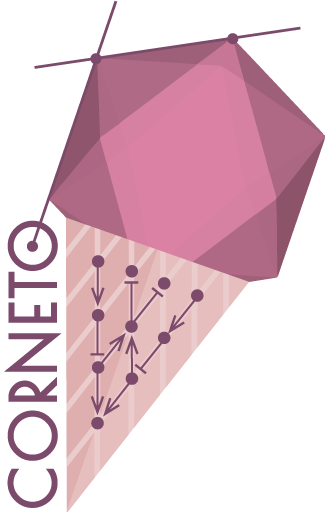

In [1]:
import corneto as cn

cn.info()

## A toy example

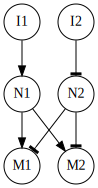

In [2]:
G = cn.Graph.from_sif_tuples(
    [
        ("I1", 1, "N1"),  # I1 activates N1
        ("N1", 1, "M1"),  # N1 activates M1
        ("N1", 1, "M2"),  # N1 activaes M2
        ("I2", -1, "N2"),  # I2 inhibits N2
        ("N2", -1, "M2"),  # N2 inhibits M2
        ("N2", -1, "M1"),  # N2 inhibits M1
    ]
)
G.plot()

In [3]:
from corneto.methods import runVanillaCarnival

# These are the measurements (e.g. TF activity from Decoupler).
# Positive values correspond to up-regulation and negative values
# with down-regulation. The bigger the absolute value is,
# the bigger the importance is
measurements = {"M1": 1, "M2": 1}

# Perturbations are the upstream nodes were the signal originates on,
# for example, ligands or receptors.
perturbations = {"I1": 1, "I2": 1}

# We run the `standard` carnival problem. This interface is similar
# to the old R function https://saezlab.github.io/CARNIVAL/reference/runVanillaCarnival.html
P, Gf = runVanillaCarnival(perturbations, measurements, G, betaWeight=0.1)

(CORNETO) May 05 07:10:28 PM - INFO    : 2/2 inputs mapped to the graph
(CORNETO) May 05 07:10:28 PM - INFO    : 2/2 outputs mapped to the graph
(CORNETO) May 05 07:10:28 PM - INFO    : Pruning the graph with size: V x E = (6, 6)...
(CORNETO) May 05 07:10:28 PM - INFO    : Finished. Final size: V x E = (6, 6).
(CORNETO) May 05 07:10:28 PM - INFO    : 2/2 inputs after pruning.
(CORNETO) May 05 07:10:28 PM - INFO    : 2/2 outputs after pruning.
(CORNETO) May 05 07:10:28 PM - INFO    : Converting into a flow graph...
(CORNETO) May 05 07:10:28 PM - INFO    : Creating a network flow problem...
(CORNETO) May 05 07:10:28 PM - INFO    : Preprocess completed.
                                     CVXPY                                     
                                     v1.4.3                                    
(CVXPY) May 05 07:10:28 PM: Your problem has 86 variables, 20 constraints, and 0 parameters.
(CVXPY) May 05 07:10:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXP

(CORNETO) May 05 07:10:28 PM - INFO    : 2/2 outputs mapped to the graph


(CORNETO) May 05 07:10:28 PM - INFO    : Pruning the graph with size: V x E = (6, 6)...


(CORNETO) May 05 07:10:28 PM - INFO    : Finished. Final size: V x E = (6, 6).


(CORNETO) May 05 07:10:28 PM - INFO    : 2/2 inputs after pruning.


(CORNETO) May 05 07:10:28 PM - INFO    : 2/2 outputs after pruning.


(CORNETO) May 05 07:10:28 PM - INFO    : Converting into a flow graph...


(CORNETO) May 05 07:10:28 PM - INFO    : Creating a network flow problem...


(CORNETO) May 05 07:10:28 PM - INFO    : Preprocess completed.


                                     CVXPY                                     
                                     v1.4.3                                    
(CVXPY) May 05 07:10:28 PM: Your problem has 86 variables, 20 constraints, and 0 parameters.


(CVXPY) May 05 07:10:28 PM: It is compliant with the following grammars: DCP, DQCP


(CVXPY) May 05 07:10:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)


(CVXPY) May 05 07:10:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


(CVXPY) May 05 07:10:28 PM: Your problem is compiled with the CPP canonicalization backend.


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 05 07:10:28 PM: Compiling problem (target solver=SCIP).


(CVXPY) May 05 07:10:28 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCIP


(CVXPY) May 05 07:10:28 PM: Applying reduction Dcp2Cone


(CVXPY) May 05 07:10:28 PM: Applying reduction CvxAttr2Constr


(CVXPY) May 05 07:10:28 PM: Applying reduction ConeMatrixStuffing


(CVXPY) May 05 07:10:28 PM: Applying reduction SCIP


(CVXPY) May 05 07:10:28 PM: Finished problem compilation (took 3.223e-02 seconds).


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 05 07:10:28 PM: Invoking solver SCIP  to obtain a solution.


presolving:
(round 1, fast)       36 del vars, 95 del conss, 0 add conss, 48 chg bounds, 1 chg sides, 23 chg coeffs, 0 upgd conss, 0 impls, 28 clqs
(round 2, fast)       54 del vars, 129 del conss, 0 add conss, 52 chg bounds, 9 chg sides, 31 chg coeffs, 0 upgd conss, 0 impls, 20 clqs
(round 3, fast)       63 del vars, 145 del conss, 0 add conss, 52 chg bounds, 11 chg sides, 33 chg coeffs, 0 upgd conss, 0 impls, 18 clqs
(round 4, fast)       65 del vars, 147 del conss, 0 add conss, 52 chg bounds, 15 chg sides, 37 chg coeffs, 0 upgd conss, 0 impls, 18 clqs
(round 5, fast)       67 del vars, 151 del conss, 0 add conss, 52 chg bounds, 15 chg sides, 37 chg coeffs, 0 upgd conss, 0 impls, 18 clqs
(round 6, exhaustive) 67 del vars, 151 del conss, 0 add conss, 52 chg bounds, 15 chg sides, 37 chg coeffs, 40 upgd conss, 0 impls, 18 clqs
   (0.0s) probing cycle finished: starting next cycle
(round 7, exhaustive) 69 del vars, 151 del conss, 0 add conss, 52 chg bounds, 15 chg sides, 37 chg coeffs, 4

(CVXPY) May 05 07:10:28 PM: Optimal value: 7.000e-01


(CVXPY) May 05 07:10:28 PM: Compilation took 3.223e-02 seconds


(CVXPY) May 05 07:10:28 PM: Solver (including time spent in interface) took 1.830e-02 seconds


(CORNETO) May 05 07:10:28 PM - INFO    : Finished in 0.07 s.


In [4]:
P.objectives[1].value

7.0

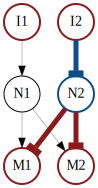

In [5]:
# The method for plotting will be simplified in next versions
G.plot(
    custom_edge_attr=cn.pl.edge_style(P, edge_var="edge_values_c0"),
    custom_vertex_attr=cn.pl.vertex_style(P, Gf, vertex_var="vertex_values_c0"),
)

In [6]:
import pandas as pd

from corneto.methods.carnival import get_result, get_selected_edges

V, E = get_result(P, Gf)
pd.DataFrame(V)

,V,value
0,N2,-1.0
1,N1,0.0
2,M2,1.0
3,I2,1.0
4,M1,1.0
5,I1,1.0
6,_s,1.0
7,_pert_c0,1.0
8,_meas_c0,0.0
9,_t,0.0


In [7]:
pd.DataFrame(E)

,E,value
0,"((I1), (N1))",0.0
1,"((N1), (M1))",0.0
2,"((N1), (M2))",0.0
3,"((I2), (N2))",-1.0
4,"((N2), (M2))",1.0
5,"((N2), (M1))",1.0
6,"((_s), (_pert_c0))",1.0
7,"((_pert_c0), (I1))",1.0
8,"((_pert_c0), (I2))",1.0
9,"((M1), (_meas_c0))",1.0


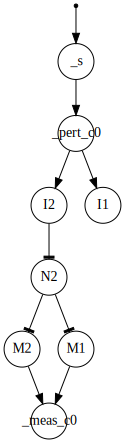

In [8]:
G_sol = Gf.edge_subgraph(get_selected_edges(P, Gf))
G_sol.plot()